In [14]:
import scipy.io as io
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv1D, MaxPool2D, Flatten
from keras.utils import np_utils
from keras.losses import BinaryCrossentropy
import tensorflow as tf

data = io.loadmat("WLDataCW.mat")
print('length is ' + str(len(data)))
print(data.keys())
print(data['__globals__'])
data_only =  data["data"]
label = data["label"]
print(data_only.shape)
print(label.shape)
data_only=data_only.T
label=label.T
#sklearn.model_selection.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)
X_train, X_test, y_train, y_test = train_test_split(data_only, label, test_size=0.25, random_state=42)



length is 5
dict_keys(['__header__', '__version__', '__globals__', 'data', 'label'])
[]
(62, 512, 360)
(1, 360)


In [15]:
cnn = tf.keras.models.Sequential()


In [16]:
cnn.add(tf.keras.layers.Conv2D(filters = 32,
                              kernel_size = 3,
                              activation = 'relu',
                              input_shape=[512, 62,1]) )

In [17]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [18]:
cnn.add(tf.keras.layers.Conv2D(filters = 32,
                              kernel_size = 3,
                              activation = 'relu'))

In [19]:
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units = 100, activation = 'relu'))
cnn.add(tf.keras.layers.Dense(units=1, activation='softmax'))

In [20]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [21]:

history = cnn.fit(X_train, y_train,
                batch_size=25,
                epochs=20,
                validation_data=(X_test, y_test))


Epoch 1/20
11/11 [==============================] - 6s 487ms/step - loss: 45.7128 - accuracy: 0.5037 - val_loss: 0.7676 - val_accuracy: 0.4889
Epoch 2/20
11/11 [==============================] - 5s 474ms/step - loss: 1.1576 - accuracy: 0.5037 - val_loss: 0.4468 - val_accuracy: 0.4889
Epoch 3/20
11/11 [==============================] - 5s 479ms/step - loss: 0.3824 - accuracy: 0.5037 - val_loss: 0.4169 - val_accuracy: 0.4889
Epoch 4/20
11/11 [==============================] - 5s 483ms/step - loss: 0.2072 - accuracy: 0.5037 - val_loss: 0.3872 - val_accuracy: 0.4889
Epoch 5/20
11/11 [==============================] - 6s 514ms/step - loss: 0.0740 - accuracy: 0.5037 - val_loss: 0.4119 - val_accuracy: 0.4889
Epoch 6/20
11/11 [==============================] - 6s 505ms/step - loss: 0.0269 - accuracy: 0.5037 - val_loss: 0.4346 - val_accuracy: 0.4889
Epoch 7/20
11/11 [==============================] - 6s 494ms/step - loss: 0.0156 - accuracy: 0.5037 - val_loss: 0.4107 - val_accuracy: 0.4889
Epoch

In [23]:
cnn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 510, 60, 32)       320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 255, 30, 32)      0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 253, 28, 32)       9248      
                                                                 
 flatten_2 (Flatten)         (None, 226688)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               22668900  
                                                                 
 dense_5 (Dense)             (None, 1)                 101       
                                                      

3/3 - 0s - loss: 0.6537 - accuracy: 0.4889 - 331ms/epoch - 110ms/step


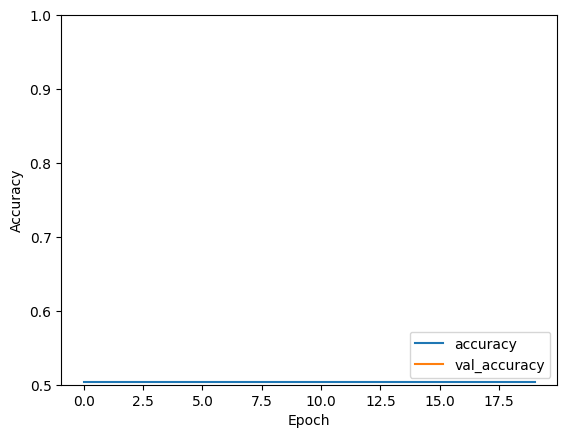

In [26]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = cnn.evaluate(X_test,  y_test, verbose=2)

In [27]:
print(test_acc)

0.4888888895511627
